In [4]:
!pip install pandas

## Setup and Data Loading

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('model-comparison-data.csv')

# Display basic information
print(f"Total data points: {len(df)}")
print(f"Models in dataset: {df['Model'].nunique()}")
print(f"Metrics available: {len(df.columns) - 2}")  # Excluding Model and Temperature columns

# Show the first few rows
df.head()

Total data points: 21
Models in dataset: 7
Metrics available: 9


,Model,Temperature,Readability,Originality,Starts_with_negation,Is_a_question,Relevance,Semantic_ambiguity,Syntactic_ambiguity,Disclosure,Misalignment_with_gpt4o
0,Mistral3:24b,0.1,13.231,0.744,0,99.93,0.781,0.663,3.02,87.96,3.55
1,Mistral3:24b,0.5,13.354,0.755,0,99.93,0.780,0.660,3.03,87.04,3.68
2,Mistral3:24b,0.7,13.589,0.762,0,99.86,0.780,0.661,3.02,89.99,4.41
3,Llama3.1:8B,0.1,12.610,0.650,0,99.27,0.778,0.668,2.66,88.44,12.47
4,Llama3.1:8B,0.5,12.770,0.660,0,98.67,0.778,0.661,2.64,86.64,13.87


## Data Overview

In [7]:
# Get unique models
models = df['Model'].unique()
print(f"Models: {models}")

# Create a summary of the data
summary = df.groupby('Model').agg({
    'Readability': 'mean',
    'Originality': 'mean',
    'Is_a_question': 'mean',
    'Relevance': 'mean',
    'Disclosure': 'mean',
    'Misalignment_with_gpt4o': 'mean'
}).round(3)

# Sort by overall misalignment (lower is better)
summary = summary.sort_values('Misalignment_with_gpt4o')
summary

Models: ['Mistral3:24b' 'Llama3.1:8B' 'Phi3.5.mini' 'Llama3.2:1B' 'GPT4-o'
 'Llama3.3:70b' 'Llama3.2:3b']


,Readability,Originality,Is_a_question,Relevance,Disclosure,Misalignment_with_gpt4o
Model,,,,,,
GPT4-o,13.444,0.769,100.000,0.790,90.613,0.327
Llama3.3:70b,13.640,0.767,100.000,0.787,91.303,1.190
Phi3.5.mini,14.917,0.830,99.627,0.788,92.613,1.400
Mistral3:24b,13.391,0.754,99.907,0.780,88.330,3.880
Llama3.1:8B,12.733,0.663,98.930,0.778,87.300,13.217
Llama3.2:3b,12.547,0.741,98.930,0.776,87.877,17.700
Llama3.2:1B,12.079,0.787,99.713,0.767,88.560,54.243


## Metric Comparison Across Models

### 1. Readability Comparison



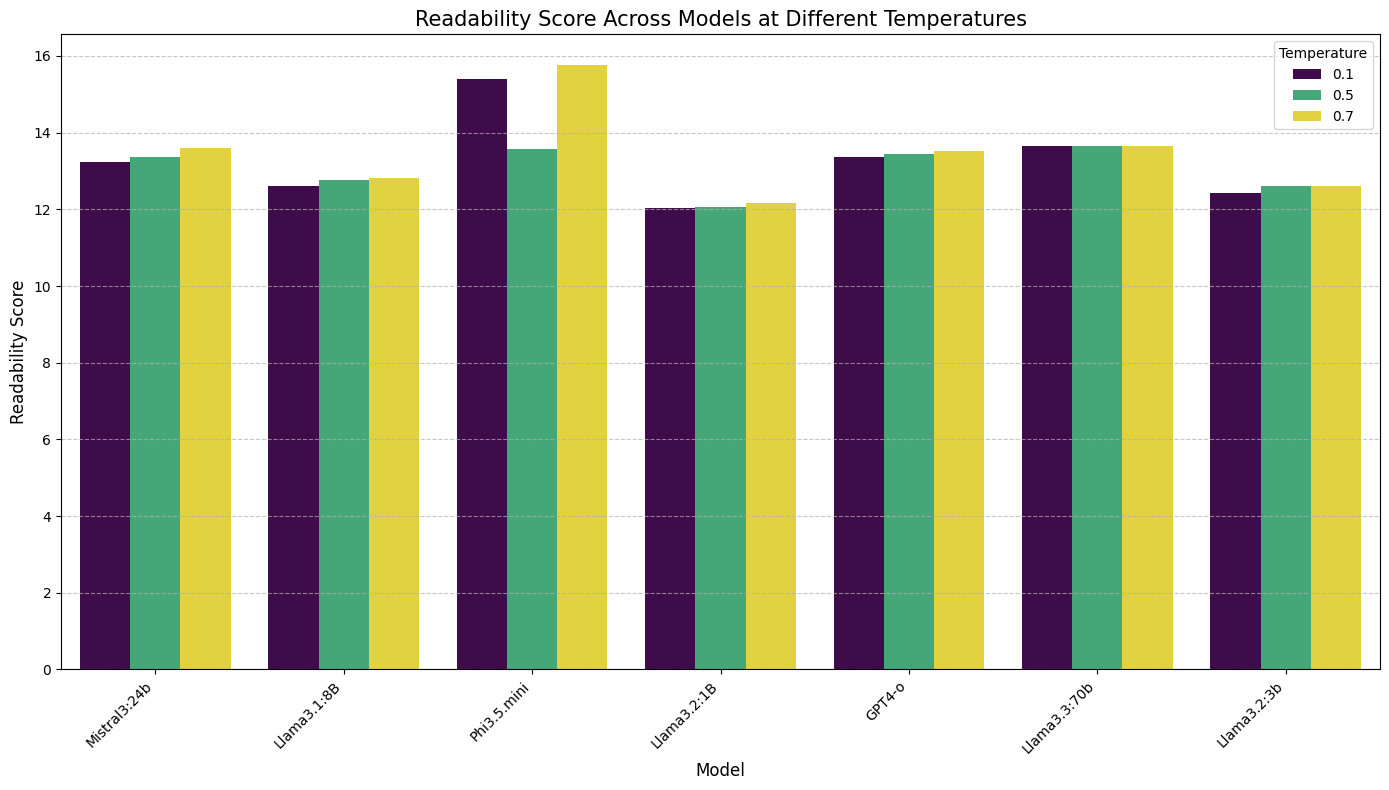

In [8]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Readability', data=df, hue='Temperature', palette='viridis')
plt.title('Readability Score Across Models at Different Temperatures', fontsize=15)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Readability Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Temperature')
plt.tight_layout()
plt.show()


/tmp/ipykernel_115578/2728044991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Model', y='Readability', data=df, palette='viridis')


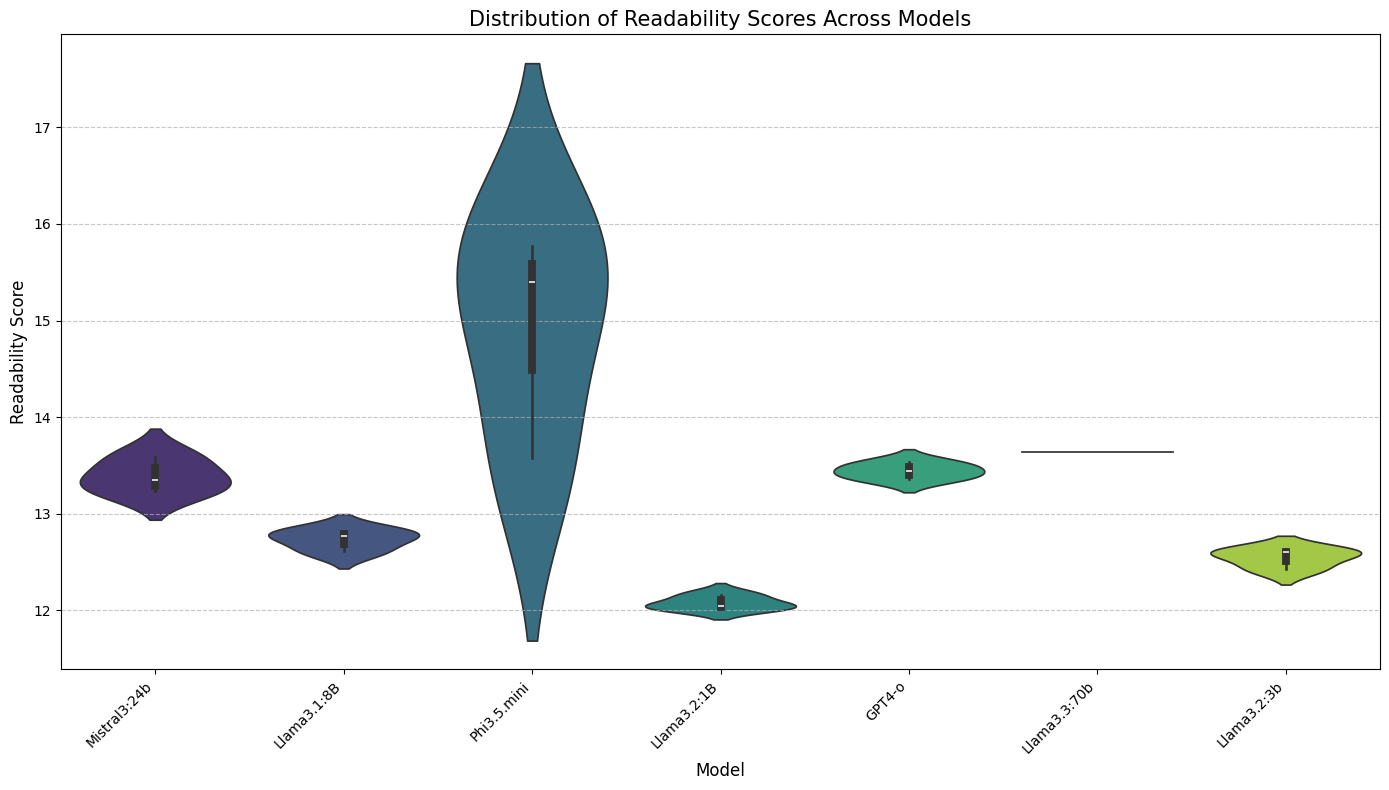

In [9]:
# Violin plot for readability distribution
plt.figure(figsize=(14, 8))
sns.violinplot(x='Model', y='Readability', data=df, palette='viridis')
plt.title('Distribution of Readability Scores Across Models', fontsize=15)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Readability Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 2. Originality Comparison


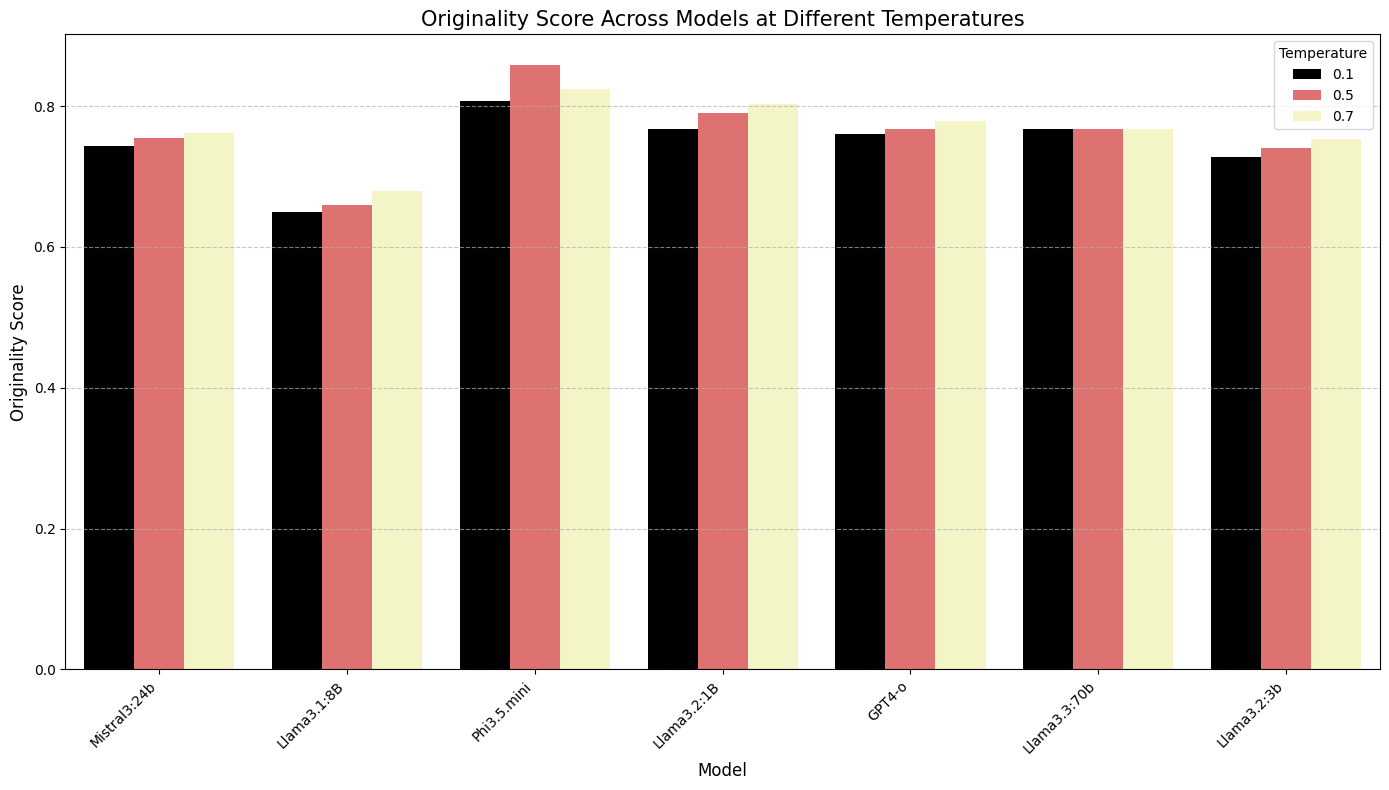

In [10]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Originality', data=df, hue='Temperature', palette='magma')
plt.title('Originality Score Across Models at Different Temperatures', fontsize=15)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Originality Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Temperature')
plt.tight_layout()
plt.show()


### 3. Relevance Comparison


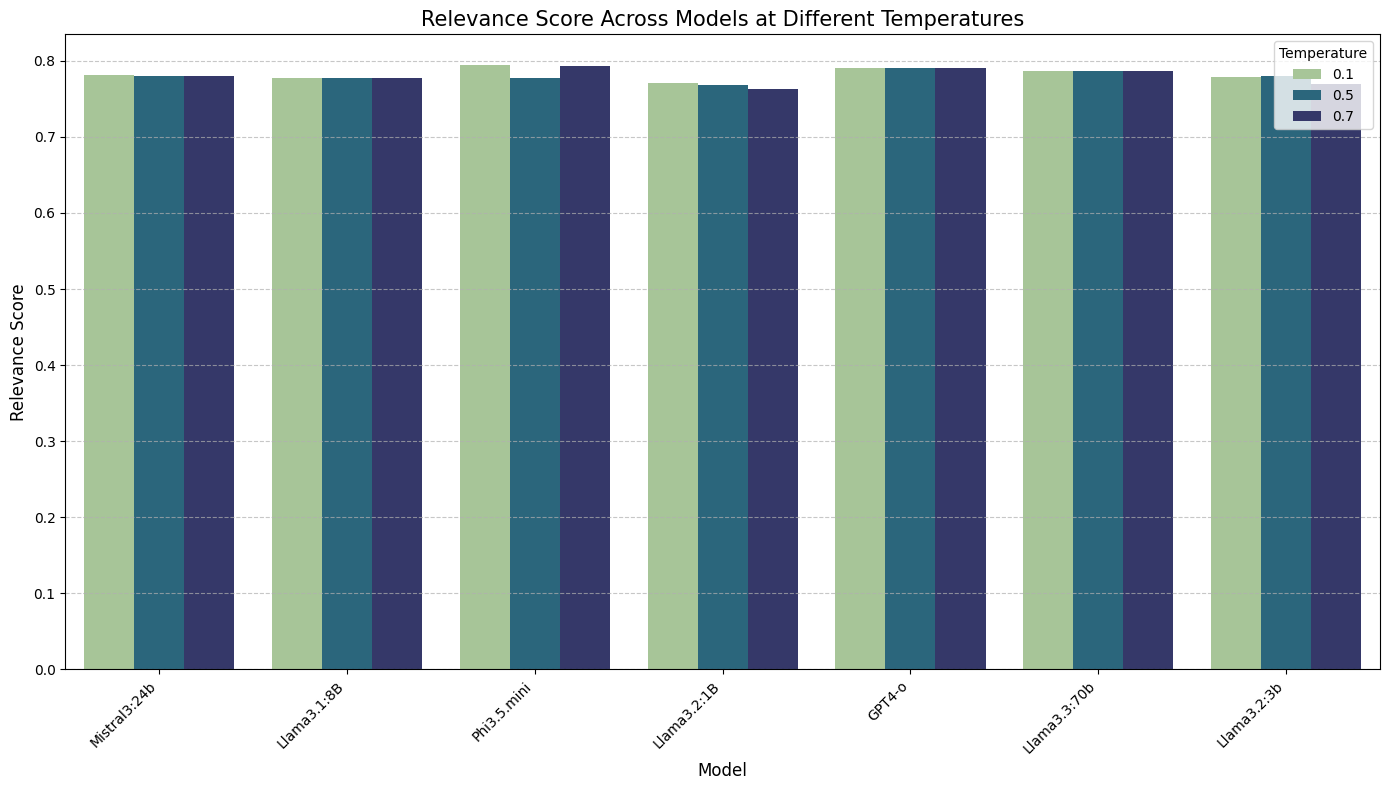

In [11]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Relevance', data=df, hue='Temperature', palette='crest')
plt.title('Relevance Score Across Models at Different Temperatures', fontsize=15)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Relevance Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Temperature')
plt.tight_layout()
plt.show()


### 4. Misalignment Analysis


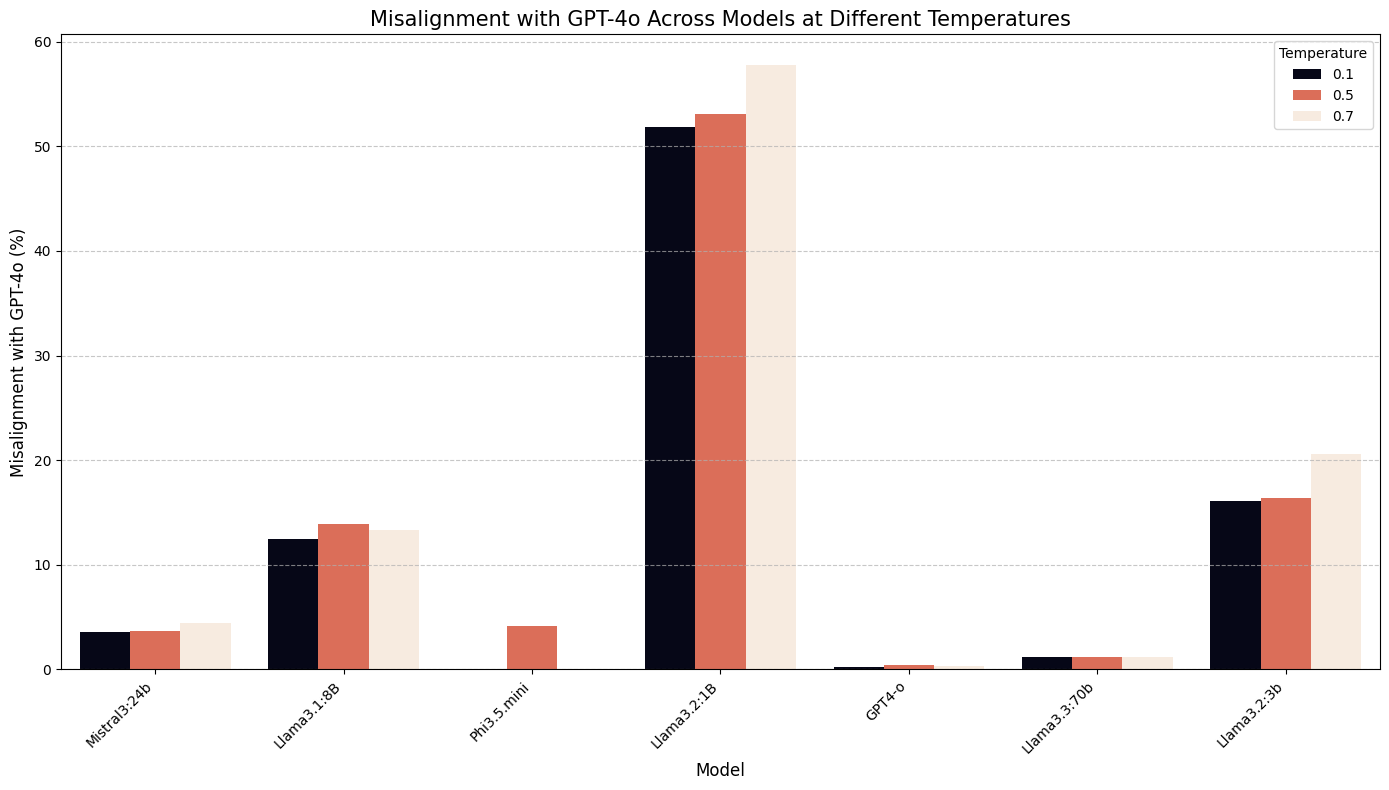

In [12]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Misalignment_with_gpt4o', data=df, hue='Temperature', palette='rocket')
plt.title('Misalignment with GPT-4o Across Models at Different Temperatures', fontsize=15)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Misalignment with GPT-4o (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Temperature')
plt.tight_layout()
plt.show()


### 5. Disclosure Rate Analysis


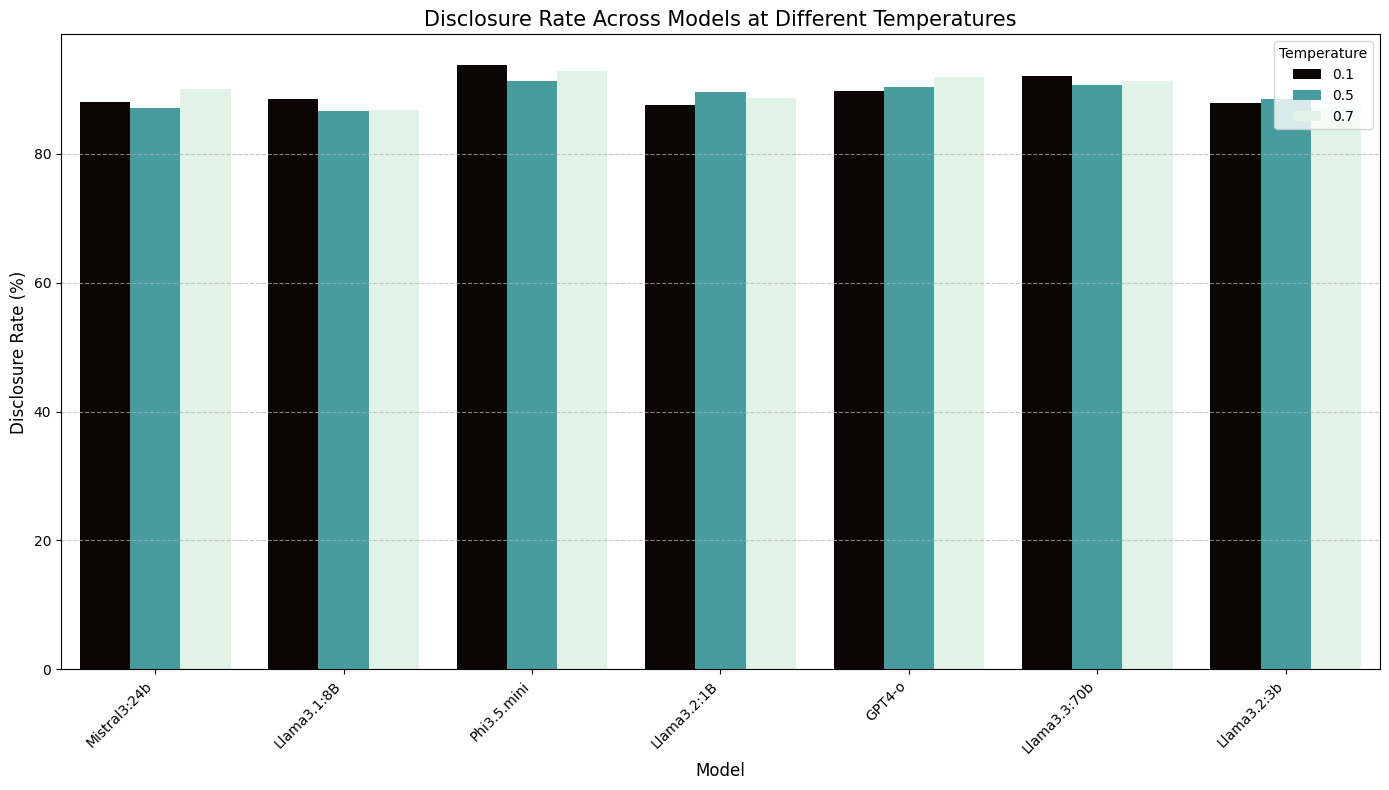

In [13]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Disclosure', data=df, hue='Temperature', palette='mako')
plt.title('Disclosure Rate Across Models at Different Temperatures', fontsize=15)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Disclosure Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Temperature')
plt.tight_layout()
plt.show()


## Temperature Impact Analysis


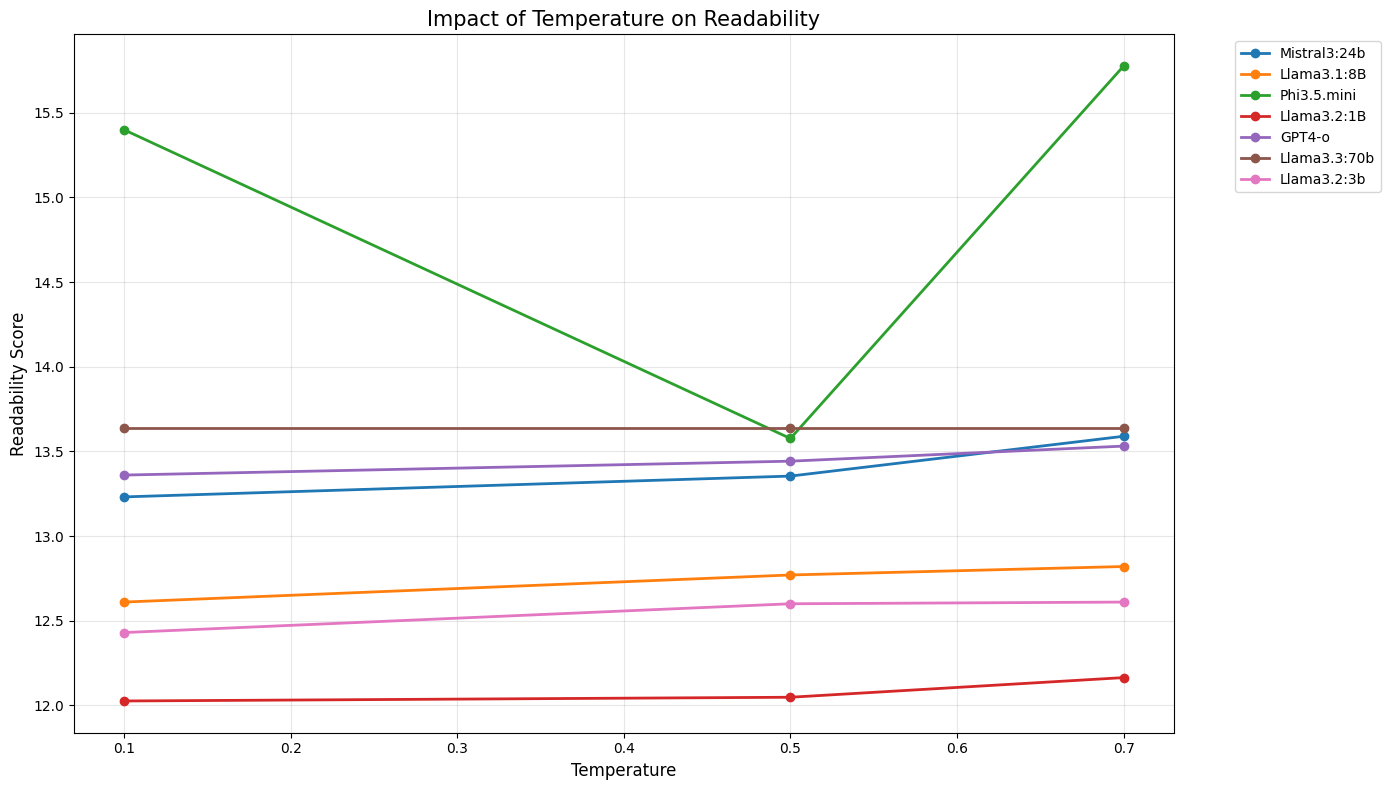

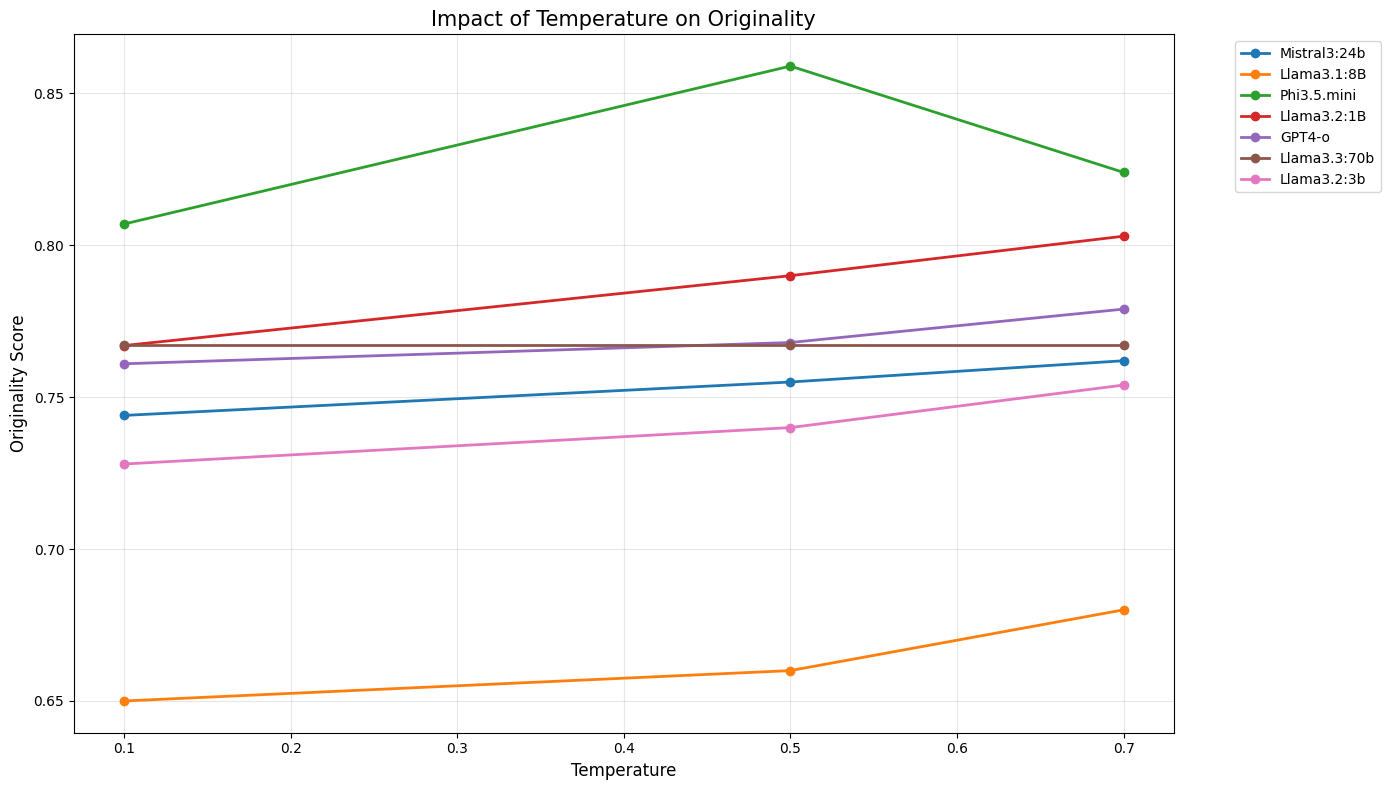

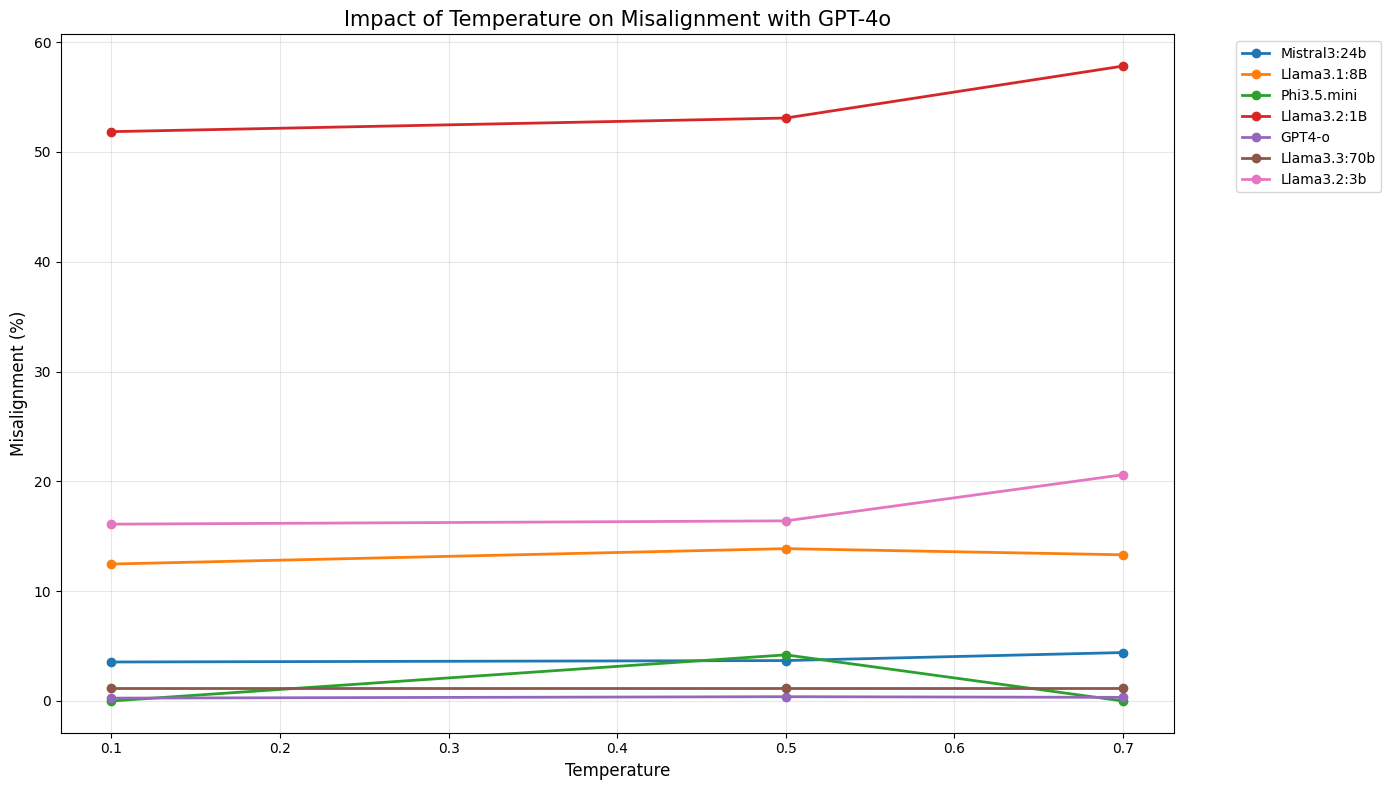

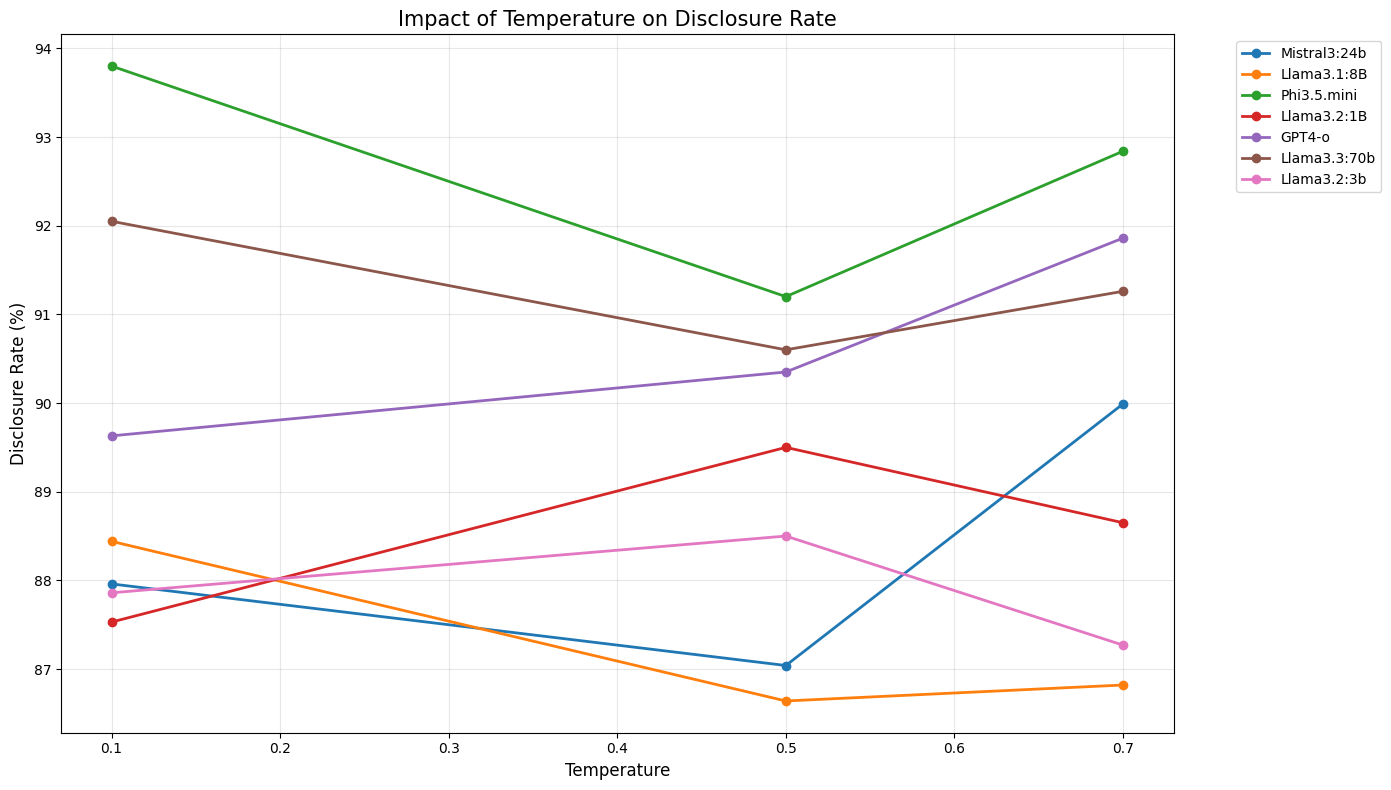

In [14]:
# Create a function to plot temperature impact for a specific metric
def plot_temperature_impact(metric, title, ylabel):
    plt.figure(figsize=(14, 8))
    
    # For each model, plot a line showing how the metric changes with temperature
    for model in models:
        model_data = df[df['Model'] == model]
        plt.plot(model_data['Temperature'], model_data[metric], marker='o', label=model, linewidth=2)
    
    plt.title(title, fontsize=15)
    plt.xlabel('Temperature', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot temperature impact for key metrics
plot_temperature_impact('Readability', 'Impact of Temperature on Readability', 'Readability Score')
plot_temperature_impact('Originality', 'Impact of Temperature on Originality', 'Originality Score')
plot_temperature_impact('Misalignment_with_gpt4o', 'Impact of Temperature on Misalignment with GPT-4o', 'Misalignment (%)')
plot_temperature_impact('Disclosure', 'Impact of Temperature on Disclosure Rate', 'Disclosure Rate (%)')


## Correlation Between Metrics


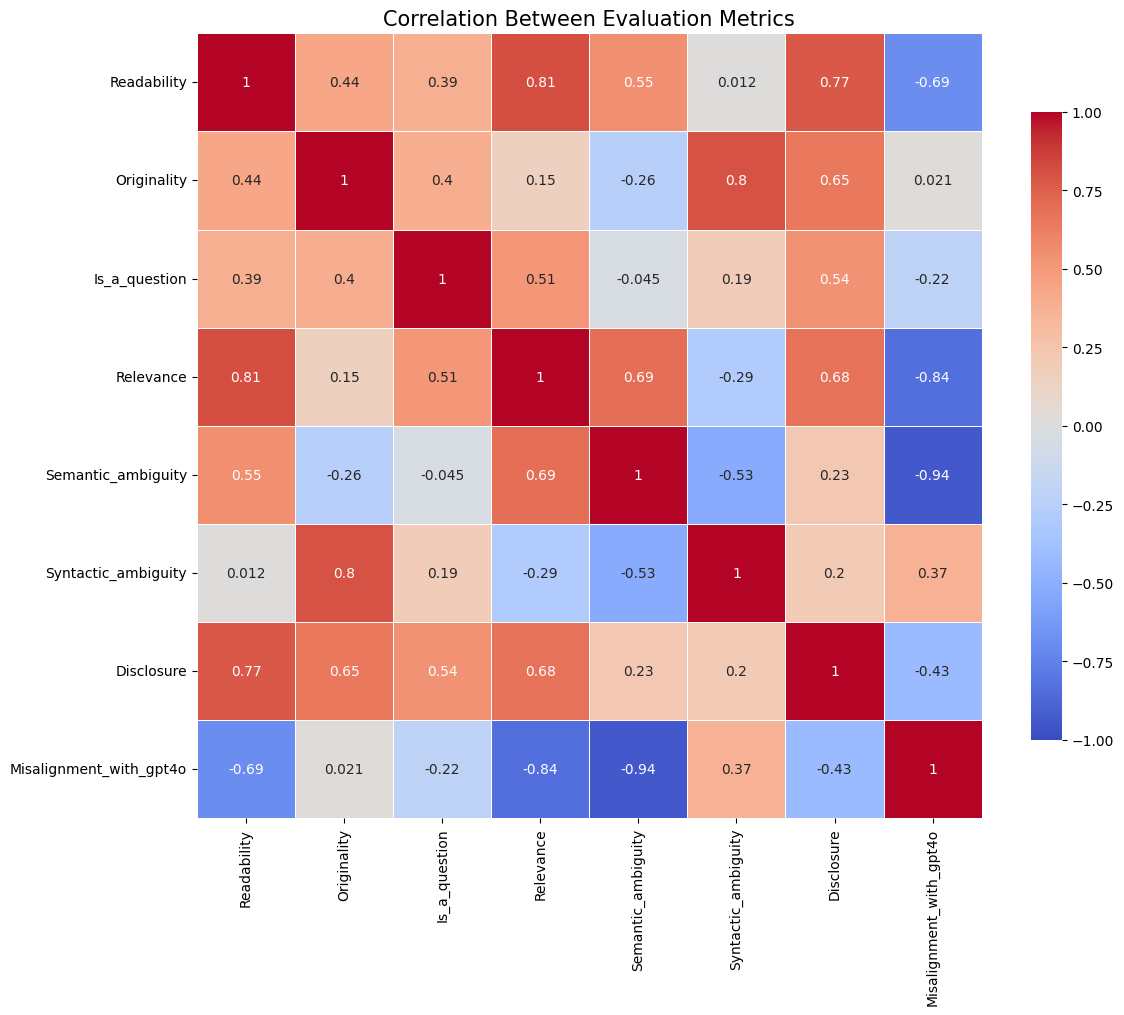

In [15]:
# Calculate correlation between metrics
correlation = df.drop(['Model', 'Temperature', 'Starts_with_negation'], axis=1).corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Between Evaluation Metrics', fontsize=15)
plt.tight_layout()
plt.show()


## Radar Chart Comparison


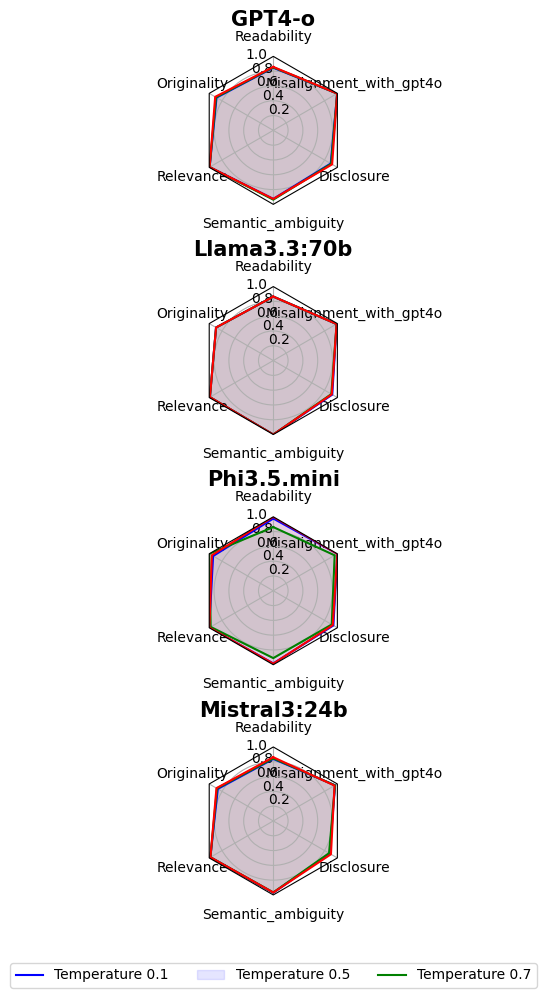

In [23]:
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.transforms import Affine2D  # Added missing import

def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes."""
    # Calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    
    class RadarAxes(PolarAxes):
        name = 'radar'
        
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.set_theta_zero_location('N')
            
        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)
            
        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)
                
        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)
                
        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)
            
        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)
                
        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)
                
        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon generates a polygon of radius 1
                # centered at (0, 0) but we want a polygon
                # centered at (0.5, 0.5) with radius 0.5
                # in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)
    
    register_projection(RadarAxes)
    return theta

# Prepare data for radar chart
def prepare_radar_data(model_names, metrics, temps=[0.1, 0.5, 0.7]):
    data = []
    for model in model_names:
        model_data = []
        for temp in temps:
            row = df[(df['Model'] == model) & (df['Temperature'] == temp)]
            if not row.empty:
                # Extract metrics, normalizing them to 0-1 range for comparison
                values = []
                for metric in metrics:
                    if metric == 'Misalignment_with_gpt4o':
                        # For misalignment, lower is better, so invert the scale
                        values.append(1 - (row[metric].values[0] / 100))
                    elif metric in ['Is_a_question', 'Disclosure']:
                        # Convert percentage to 0-1 scale
                        values.append(row[metric].values[0] / 100)
                    else:
                        # For other metrics, normalize by the max value in the dataset
                        max_val = df[metric].max()
                        values.append(row[metric].values[0] / max_val)
                model_data.append(values)
        data.append(model_data)
    return data

# Create radar charts
def plot_radar_charts(model_names, metrics, temperatures=[0.1, 0.5, 0.7]):
    theta = radar_factory(len(metrics), frame='polygon')
    
    # Prepare the data
    data = prepare_radar_data(model_names, metrics, temperatures)
    
    # Set up the figure
    fig, axs = plt.subplots(figsize=(15, 10), nrows=len(model_names), ncols=1,
                           subplot_kw=dict(projection='radar'))
    
    # Make sure axs is always a list
    if len(model_names) == 1:
        axs = [axs]
    
    # Plot the data
    colors = ['b', 'g', 'r']
    for i, ax in enumerate(axs):
        ax.set_title(model_names[i], weight='bold', size=15, position=(0.5, 1.1),
                   horizontalalignment='center', verticalalignment='center')
        for j, temp in enumerate(temperatures):
            ax.plot(theta, data[i][j], color=colors[j], label=f'Temp {temp}')
            ax.fill(theta, data[i][j], color=colors[j], alpha=0.1)
        ax.set_varlabels(metrics)
        ax.set_ylim(0, 1)
    
    # Add a legend
    fig.legend(
        labels=[f'Temperature {t}' for t in temperatures],
        loc='lower center',
        bbox_to_anchor=(0.5, 0),
        ncol=3
    )
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    plt.show()

# Define metrics to compare (excluding some for clarity)
radar_metrics = [
    'Readability', 'Originality', 'Relevance', 
    'Semantic_ambiguity', 'Disclosure', 'Misalignment_with_gpt4o'
]

# Plot radar charts for selected models (to avoid overcrowding)
selected_models = ['GPT4-o', 'Llama3.3:70b', 'Phi3.5.mini', 'Mistral3:24b']
plot_radar_charts(selected_models, radar_metrics)


## Temperature Sensitivity Analysis


In [17]:
# Calculate the standard deviation of each metric across temperatures for each model
temp_sensitivity = df.groupby('Model').agg({
    'Readability': np.std,
    'Originality': np.std,
    'Is_a_question': np.std,
    'Relevance': np.std,
    'Semantic_ambiguity': np.std,
    'Syntactic_ambiguity': np.std,
    'Disclosure': np.std,
    'Misalignment_with_gpt4o': np.std
}).round(4)

# Sort by overall sensitivity (average std across metrics)
temp_sensitivity['Average_Sensitivity'] = temp_sensitivity.mean(axis=1)
temp_sensitivity = temp_sensitivity.sort_values('Average_Sensitivity', ascending=False)

# Display the results
print("Temperature Sensitivity Analysis (Standard Deviation Across Temperatures)")
temp_sensitivity


Temperature Sensitivity Analysis (Standard Deviation Across Temperatures)


/tmp/ipykernel_115578/295391893.py:2: FutureWarning: The provided callable <function std at 0x710a384404a0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  temp_sensitivity = df.groupby('Model').agg({
/tmp/ipykernel_115578/295391893.py:2: FutureWarning: The provided callable <function std at 0x710a384404a0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  temp_sensitivity = df.groupby('Model').agg({


,Readability,Originality,Is_a_question,Relevance,Semantic_ambiguity,Syntactic_ambiguity,Disclosure,Misalignment_with_gpt4o,Average_Sensitivity
Model,,,,,,,,,
Phi3.5.mini,1.1762,0.0265,0.4839,0.0099,0.0289,0.1214,1.3147,2.4249,0.698300
Llama3.2:1B,0.0741,0.0182,0.3384,0.0040,0.0061,0.1349,0.9881,3.1504,0.589275
Llama3.2:3b,0.1012,0.0130,0.5174,0.0055,0.0096,0.0513,0.6152,2.5159,0.478637
Mistral3:24b,0.1819,0.0091,0.0404,0.0006,0.0015,0.0058,1.5094,0.4636,0.276537
Llama3.1:8B,0.1097,0.0153,0.3079,0.0006,0.0056,0.0115,0.9914,0.7047,0.268338
GPT4-o,0.0855,0.0091,0.0000,0.0000,0.0040,0.0058,1.1381,0.0651,0.163450
Llama3.3:70b,0.0000,0.0000,0.0000,0.0000,0.0000,0.0153,0.7260,0.0000,0.092662


## Model Size vs. Performance Analysis


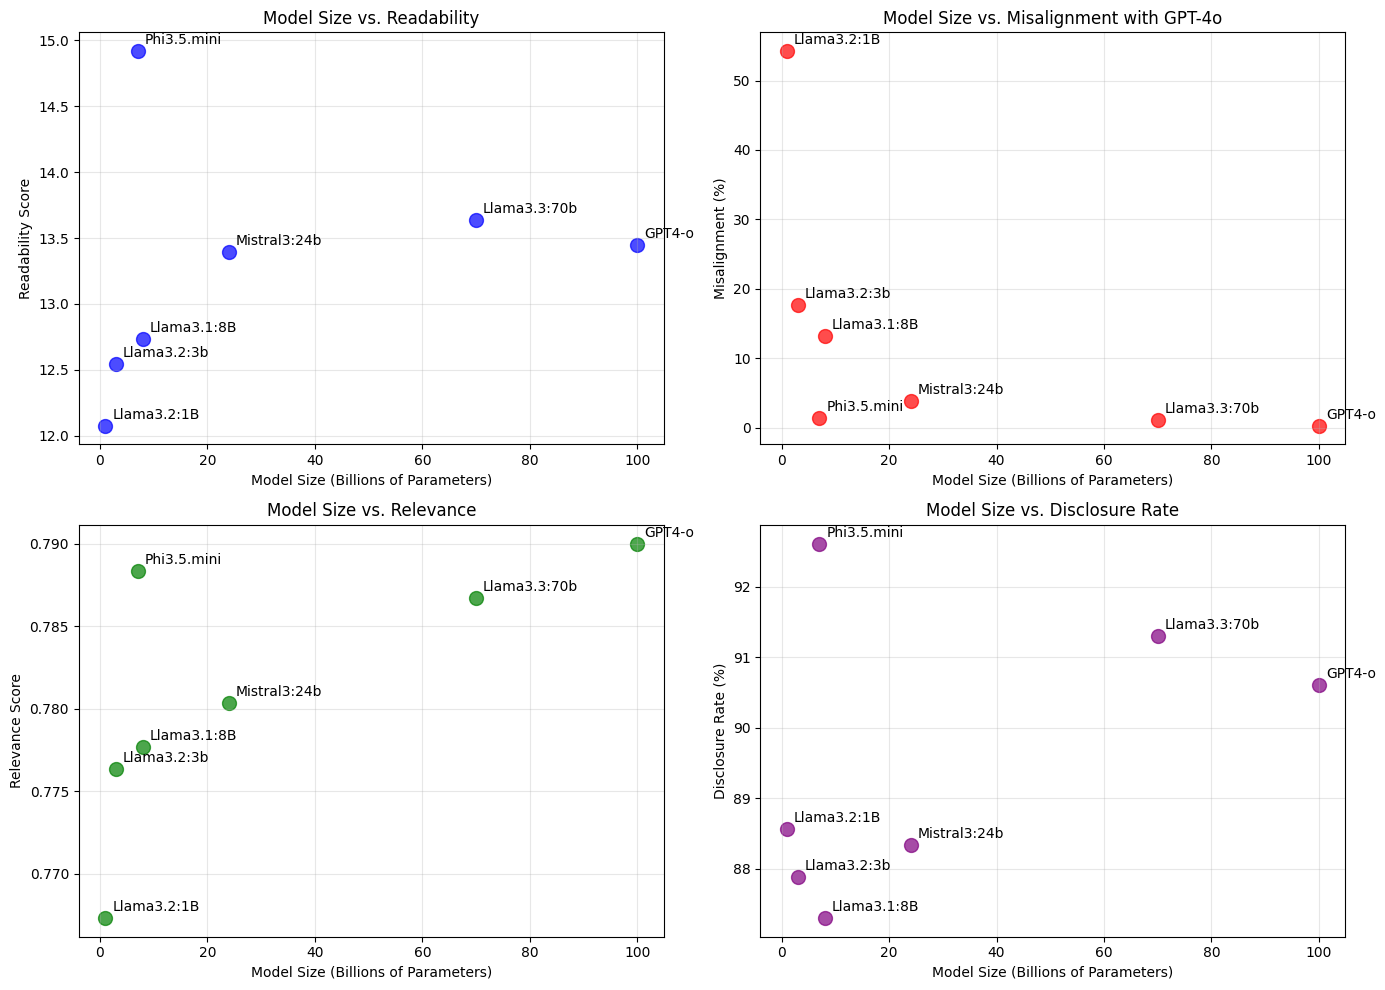

In [18]:
# Create a dictionary mapping models to their approximate sizes in billions of parameters
# Based on model names - these are estimates
model_sizes = {
    'Llama3.2:1B': 1,
    'Llama3.2:3b': 3,
    'Llama3.1:8B': 8,
    'Phi3.5.mini': 7,  # Estimate
    'Mistral3:24b': 24,
    'GPT4-o': 100,     # Estimate
    'Llama3.3:70b': 70
}

# Create a dataframe with model sizes
size_df = pd.DataFrame({
    'Model': list(model_sizes.keys()),
    'Size_Billions': list(model_sizes.values())
})

# Create average metrics per model
avg_metrics = df.groupby('Model').agg({
    'Readability': 'mean',
    'Originality': 'mean',
    'Relevance': 'mean',
    'Misalignment_with_gpt4o': 'mean',
    'Disclosure': 'mean'
}).reset_index()

# Merge with size information
performance_by_size = pd.merge(avg_metrics, size_df, on='Model', how='inner')

# Sort by size
performance_by_size = performance_by_size.sort_values('Size_Billions')

# Plot key metrics vs model size
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.scatter(performance_by_size['Size_Billions'], performance_by_size['Readability'], 
           s=100, alpha=0.7, c='blue')
for i, model in enumerate(performance_by_size['Model']):
    plt.annotate(model, 
                (performance_by_size['Size_Billions'].iloc[i], 
                 performance_by_size['Readability'].iloc[i]),
                xytext=(5, 5), textcoords='offset points')
plt.title('Model Size vs. Readability')
plt.xlabel('Model Size (Billions of Parameters)')
plt.ylabel('Readability Score')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.scatter(performance_by_size['Size_Billions'], performance_by_size['Misalignment_with_gpt4o'], 
           s=100, alpha=0.7, c='red')
for i, model in enumerate(performance_by_size['Model']):
    plt.annotate(model, 
                (performance_by_size['Size_Billions'].iloc[i], 
                 performance_by_size['Misalignment_with_gpt4o'].iloc[i]),
                xytext=(5, 5), textcoords='offset points')
plt.title('Model Size vs. Misalignment with GPT-4o')
plt.xlabel('Model Size (Billions of Parameters)')
plt.ylabel('Misalignment (%)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.scatter(performance_by_size['Size_Billions'], performance_by_size['Relevance'], 
           s=100, alpha=0.7, c='green')
for i, model in enumerate(performance_by_size['Model']):
    plt.annotate(model, 
                (performance_by_size['Size_Billions'].iloc[i], 
                 performance_by_size['Relevance'].iloc[i]),
                xytext=(5, 5), textcoords='offset points')
plt.title('Model Size vs. Relevance')
plt.xlabel('Model Size (Billions of Parameters)')
plt.ylabel('Relevance Score')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.scatter(performance_by_size['Size_Billions'], performance_by_size['Disclosure'], 
           s=100, alpha=0.7, c='purple')
for i, model in enumerate(performance_by_size['Model']):
    plt.annotate(model, 
                (performance_by_size['Size_Billions'].iloc[i], 
                 performance_by_size['Disclosure'].iloc[i]),
                xytext=(5, 5), textcoords='offset points')
plt.title('Model Size vs. Disclosure Rate')
plt.xlabel('Model Size (Billions of Parameters)')
plt.ylabel('Disclosure Rate (%)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Performance vs. Efficiency Analysis


In [19]:
# Calculate efficiency (performance per billion parameters)
performance_by_size['Readability_Efficiency'] = performance_by_size['Readability'] / performance_by_size['Size_Billions']
performance_by_size['Relevance_Efficiency'] = performance_by_size['Relevance'] / performance_by_size['Size_Billions']
performance_by_size['Misalignment_Efficiency'] = 1 / (performance_by_size['Misalignment_with_gpt4o'] * performance_by_size['Size_Billions'] + 0.001)
performance_by_size['Disclosure_Efficiency'] = performance_by_size['Disclosure'] / performance_by_size['Size_Billions']

# Sort by overall efficiency
performance_by_size['Overall_Efficiency'] = (
    performance_by_size['Readability_Efficiency'] + 
    performance_by_size['Relevance_Efficiency'] + 
    performance_by_size['Misalignment_Efficiency'] + 
    performance_by_size['Disclosure_Efficiency']
) / 4

# Display efficiency metrics
performance_by_size[['Model', 'Size_Billions', 'Readability_Efficiency', 
                     'Relevance_Efficiency', 'Misalignment_Efficiency',
                     'Disclosure_Efficiency', 'Overall_Efficiency']].sort_values('Overall_Efficiency', ascending=False)


,Model,Size_Billions,Readability_Efficiency,Relevance_Efficiency,Misalignment_Efficiency,Disclosure_Efficiency,Overall_Efficiency
2,Llama3.2:1B,1,12.079333,0.767333,0.018435,88.560000,25.356275
3,Llama3.2:3b,3,4.182222,0.258778,0.018832,29.292222,8.438014
6,Phi3.5.mini,7,2.130952,0.112619,0.102030,13.230476,3.894020
1,Llama3.1:8B,8,1.591667,0.097208,0.009458,10.912500,3.152708
5,Mistral3:24b,24,0.557972,0.032514,0.010739,3.680417,1.070410
4,Llama3.3:70b,70,0.194857,0.011239,0.012005,1.304333,0.380608
0,GPT4-o,100,0.134443,0.007900,0.030611,0.906133,0.269772


## Conclusion


In [20]:
# Create a summary table with rankings
def rank_models(df, metric, ascending=True):
    """Rank models by a metric, with 1 being the best"""
    return df.sort_values(metric, ascending=ascending).reset_index(drop=True).reset_index().rename(columns={'index': f'{metric}_rank'})

# Get rankings for each important metric
readability_rank = rank_models(avg_metrics, 'Readability', ascending=False)[['Model', 'Readability_rank']]
originality_rank = rank_models(avg_metrics, 'Originality', ascending=False)[['Model', 'Originality_rank']]
relevance_rank = rank_models(avg_metrics, 'Relevance', ascending=False)[['Model', 'Relevance_rank']]
misalignment_rank = rank_models(avg_metrics, 'Misalignment_with_gpt4o', ascending=True)[['Model', 'Misalignment_with_gpt4o_rank']]
disclosure_rank = rank_models(avg_metrics, 'Disclosure', ascending=False)[['Model', 'Disclosure_rank']]

# Combine all rankings
rankings = readability_rank.merge(originality_rank, on='Model')
rankings = rankings.merge(relevance_rank, on='Model')
rankings = rankings.merge(misalignment_rank, on='Model')
rankings = rankings.merge(disclosure_rank, on='Model')

# Calculate average rank
rankings['Average_Rank'] = rankings[[col for col in rankings.columns if col.endswith('_rank')]].mean(axis=1)

# Sort by average rank
rankings = rankings.sort_values('Average_Rank')

# Display final rankings
rankings


,Model,Readability_rank,Originality_rank,Relevance_rank,Misalignment_with_gpt4o_rank,Disclosure_rank,Average_Rank
0,Phi3.5.mini,0,0,1,2,0,0.6
2,GPT4-o,2,2,0,0,2,1.2
1,Llama3.3:70b,1,3,2,1,1,1.6
3,Mistral3:24b,3,4,3,3,4,3.4
6,Llama3.2:1B,6,1,6,6,3,4.4
4,Llama3.1:8B,4,6,4,4,6,4.8
5,Llama3.2:3b,5,5,5,5,5,5.0


In [21]:
# Final visualization - Overall performance heatmap
models_order = rankings['Model'].tolist()
metrics_to_plot = ['Readability', 'Originality', 'Relevance', 'Disclosure', 'Misalignment_with_gpt4o']

# Create a pivot table for the heatmap
heatmap_data = pd.pivot_table(
    df,
    values=metrics_to_plot,
    index='Model',
    columns='Temperature'
).reset_index()

# Rearrange rows by overall ranking
heatmap_data = heatmap_data.set_index('Model').loc[models_order].reset_index()

# Create a long format for the heatmap
heatmap_long = pd.melt(
    heatmap_data, 
    id_vars=['Model'], 
    value_vars=[(metric, temp) for metric in metrics_to_plot for temp in [0.1, 0.5, 0.7]],
    var_name=['Metric', 'Temperature'],
    value_name='Value'
)

# Normalize values for better visualization
for metric in metrics_to_plot:
    if metric == 'Misalignment_with_gpt4o':
        # For misalignment, lower is better, so invert for visual clarity
        max_val = heatmap_long[heatmap_long['Metric'] == metric]['Value'].max()
        heatmap_long.loc[heatmap_long['Metric'] == metric, 'Value'] = max_val - heatmap_long.loc[heatmap_long['Metric'] == metric, 'Value']
    else:
        # For other metrics, normalize by the max value
        max_val = heatmap_long[heatmap_long['Metric'] == metric]['Value'].max()
        min_val = heatmap_long[heatmap_long['Metric'] == metric]['Value'].min()
        heatmap_long.loc[heatmap_long['Metric'] == metric, 'Value'] = (heatmap_long.loc[heatmap_long['Metric'] == metric, 'Value'] - min_val) / (max_val - min_val)

# Create a summary heatmap
plt.figure(figsize=(18, 10))
pivot = pd.pivot_table(
    heatmap_long,
    values='Value',
    index=['Model', 'Temperature'],
    columns='Metric'
)

cmap = sns.diverging_palette(220, 20, as_cmap=True)
ax = sns.heatmap(pivot, cmap=cmap, center=0.5, annot=True, fmt='.2f', linewidth=0.5)
plt.title('Overall Performance Comparison Across Models and Temperatures', fontsize=16)
plt.tight_layout()
plt.show()


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Model']"